In [1]:
import csv
import psycopg2

In [2]:
import networkx as nx
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

db[:5]

[['session', 'year', 'country', 'text'],
 ['44',
  '1989',
  'MDV',
  "ï»¿It is indeed a pleasure for me and the members of my delegation to extend to Ambassador Garba our sincere congratulations on his election to the presidency of the forty-fourth session of the General Assembly. His election to this high office is a well-deserved tribute to his personal qualities and experience. I am fully confident that under his able and wise leadership the Assembly will further consolidate the gains achieved during the past year.\nMy delegation associates itself with previous speakers in expressing its appreciation of the dedicated efforts of his predecessor, His Excellency Mr. Dante Caputo, for the exemplary manner in which he discharged his duties as President of the forty-third session of the General Assembly.\nAs in previous years, my delegation wishes to note its satisfaction with and gratitude for the assiduous and unrelenting efforts exerted by the Secretary-General of the United Nations i

In [4]:
conn = psycopg2.connect("postgresql://millbr02:@localhost/world")
cur = conn.cursor()
cur.execute("select name from country")
res = cur.fetchall()
matrix1 = {}
matrix2 = {}
for row in res:
    matrix1[row[0]] = 0
matrix1['Czechoslovakia'] = 0
matrix1['East Germany'] = 0
matrix1['European Union'] = 0
matrix1['Montenegro'] = 0
matrix1['Romania'] = 0
matrix1['South Sudan'] = 0
matrix1['East Timor'] = 0
matrix1['Democratic Yemen'] = 0
for row in res:
    copiedmatrix = matrix1.copy()
    matrix2[row[0]] = copiedmatrix
matrix2['Czechoslovakia'] = copiedmatrix
matrix2['East Germany'] = copiedmatrix
matrix2['European Union'] = copiedmatrix
matrix2['Montenegro'] = copiedmatrix
matrix2['Romania'] = copiedmatrix
matrix2['South Sudan'] = copiedmatrix
matrix2['East Timor'] = copiedmatrix
matrix2['Democratic Yemen'] = copiedmatrix

In [12]:
g = nx.Graph()
g.add_nodes_from(matrix2)

In [13]:
# first just create an in-memory list that contains all of the csv data
with open('/home/faculty/millbr02/pub/un-general-debates.csv','r',encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

unknown_country = []  
other_countries = {'CSK': ['Czechoslovakia', 'Europe', 'Eastern Europe'] , 
    'DDR': ['East Germany', 'Europe', 'Western Europe'],
    'EU': ['European Union', 'Europe','Western Europe'],
    'MNE': ['Montenegro', 'Europe', 'Eastern Europe'], 
    'ROU': ['Romania', 'Europe','Eastern Europe'], 
    'SSD': ['South Sudan', 'Africa', 'Northern Africa'], 
    'TLS': ['East Timor','Asia','Southeast Asia'], 
    'YDYE': ['Democratic Yemen', 'Asia', 'Middle East']}

for row in db[1:]:   # skip the first row
    cur.execute("""select code, name, region, continent 
                   from country where code = %s""", [row[2]])
    country = cur.fetchone()
    if country:
        row.append(country[1])  # name
        row.append(country[2])  # region
        row.append(country[3])  # continent
    else:
        unknown_country.append(row[2])
        row.append(other_countries[row[2]][0])  # name
        row.append(other_countries[row[2]][2])  # region
        row.append(other_countries[row[2]][1])  # continent
        
                
    quote = row[3]
    talkingcountry = row[4]
    for i in matrix2:
        matrix2[talkingcountry][i] += quote.count(i)
        if quote.count(i) > 20:
            g.add_edge(talkingcountry, i)


for i in matrix2:
    print(i + ' mentions...')
    for nation in matrix2[i]:
        print(nation + ' ' + str(matrix2[i][nation]) + ' times')
    print()
    print()

Antarctica mentions...
Antarctica 0 times
United States Minor Outlying Islands 0 times
Eritrea 0 times
Spain 0 times
Tonga 0 times
Guinea-Bissau 0 times
Mexico 0 times
San Marino 0 times
Germany 0 times
Togo 0 times
Colombia 0 times
Western Sahara 0 times
Holy See (Vatican City State) 0 times
Canada 0 times
Guyana 0 times
Saint Pierre and Miquelon 0 times
Malaysia 0 times
Rwanda 0 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 0 times
East Germany 0 times
Guam 0 times
United Kingdom 0 times
Congo 0 times
Bouvet Island 0 times
Latvia 0 times
Honduras 0 times
Sierra Leone 0 times
Estonia 0 times
Suriname 0 times
Lithuania 0 times
Croatia 0 times
Guatemala 0 times
Thailand 0 times
India 0 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 0 times
South Sudan 0 times
Georgia 0 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 0 times
Jordan 0 times
Taiwan 0 times
Armenia 0 times
French Guiana 0 times
I

Svalbard and Jan Mayen 0 times
Solomon Islands 18 times
Afghanistan 0 times
Niue 6 times
Gambia 0 times
Hungary 0 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 0 times
Paraguay 0 times
Côte dIvoire 0 times
Japan 45 times
Faroe Islands 0 times
Singapore 6 times
Senegal 0 times
Samoa 21 times
Namibia 0 times
Sao Tome and Principe 0 times
Saint Kitts and Nevis 0 times
Montenegro 0 times
Virgin Islands, U.S. 0 times
Falkland Islands 0 times
East Timor 3 times
Syria 3 times
Philippines 0 times
Vietnam 0 times
Burundi 0 times
Portugal 0 times
Bangladesh 0 times
Angola 0 times
Papua New Guinea 0 times
Micronesia, Federated States of 0 times
Mauritius 27 times
Saudi Arabia 0 times
Iran 0 times
Malta 0 times
American Samoa 0 times
Christmas Island 0 times
Monaco 0 times
Sudan 3 times
Saint Helena 0 times
Democratic Yemen 0 times
Switzerland 3 times
French Polynesia 0 times
Australia 30 times
Ecuador 0 times
North Korea 0 times


Guinea-Bissau mentions...
Antarctica 0 time

Ethiopia 0 times
New Zealand 0 times
Saint Lucia 0 times
Oman 0 times
Pakistan 0 times
Swaziland 0 times
South Africa 0 times
Slovakia 0 times
Gabon 0 times
Qatar 0 times
Palau 0 times
United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 0 times
Brazil 0 times
Cook Islands 0 times
Yugoslavia 0 times
Sweden 0 times
Bolivia 0 times
Brunei 0 times
Venezuela 0 times
Myanmar 0 times
Lebanon 0 times
Trinidad and Tobago 0 times
Mauritania 0 times
Macedonia 0 times
Haiti 0 times
Bahamas 0 times
Chile 0 times
Cuba 0 times
Romania 0 times
Malawi 0 times
Tajikistan 0 times
Tunisia 0 times
Denmark 0 times
Russian Federation 0 times
Chad 0 times
Iceland 0 times
Dominica 0 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 0 times
Nepal 0 times
Ukraine 0 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 0 times
Jamaica 0 times
Turkey 0 times
French Southern territories 0 tim

Djibouti 0 times
Brazil 27 times
Cook Islands 0 times
Yugoslavia 12 times
Sweden 3 times
Bolivia 3 times
Brunei 0 times
Venezuela 3 times
Myanmar 0 times
Lebanon 111 times
Trinidad and Tobago 0 times
Mauritania 6 times
Macedonia 3 times
Haiti 63 times
Bahamas 0 times
Chile 0 times
Cuba 57 times
Romania 0 times
Malawi 3 times
Tajikistan 0 times
Tunisia 24 times
Denmark 0 times
Russian Federation 6 times
Chad 6 times
Iceland 0 times
Dominica 0 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 3 times
Nepal 0 times
Ukraine 72 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 0 times
Jamaica 3 times
Turkey 12 times
French Southern territories 0 times
Algeria 6 times
Bahrain 24 times
Palestine 51 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 0 times
Afghanistan 219 times
Niue 0 times
Gambia 3 times
Hungary 18 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 54 times
Paraguay 0 tim

Maldives 0 times
Vanuatu 3 times
Seychelles 24 times
Niger 9 times
Greenland 0 times
Kenya 27 times
Uruguay 27 times
Norway 12 times
Zimbabwe 102 times
Nigeria 9 times
Nauru 3 times
Zambia 12 times
Wallis and Futuna 0 times
Somalia 123 times
Antigua and Barbuda 0 times
Costa Rica 18 times
Iraq 48 times
Gibraltar 0 times
Slovenia 0 times
Nicaragua 6 times
Ethiopia 15 times
New Zealand 0 times
Saint Lucia 3 times
Oman 0 times
Pakistan 6 times
Swaziland 0 times
South Africa 669 times
Slovakia 3 times
Gabon 6 times
Qatar 3 times
Palau 0 times
United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 6 times
Brazil 3 times
Cook Islands 0 times
Yugoslavia 21 times
Sweden 3 times
Bolivia 0 times
Brunei 3 times
Venezuela 0 times
Myanmar 0 times
Lebanon 33 times
Trinidad and Tobago 0 times
Mauritania 6 times
Macedonia 3 times
Haiti 12 times
Bahamas 0 times
Chile 0 times
Cuba 33 times
Romania 0 times
Malawi 3 times
Tajikistan 0 times
Tunisia 3

Antarctica 0 times
United States Minor Outlying Islands 0 times
Eritrea 0 times
Spain 3 times
Tonga 3 times
Guinea-Bissau 3 times
Mexico 3 times
San Marino 0 times
Germany 21 times
Togo 0 times
Colombia 0 times
Western Sahara 0 times
Holy See (Vatican City State) 0 times
Canada 3 times
Guyana 0 times
Saint Pierre and Miquelon 0 times
Malaysia 3 times
Rwanda 15 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 0 times
East Germany 0 times
Guam 0 times
United Kingdom 6 times
Congo 3 times
Bouvet Island 0 times
Latvia 1917 times
Honduras 0 times
Sierra Leone 0 times
Estonia 36 times
Suriname 0 times
Lithuania 30 times
Croatia 6 times
Guatemala 0 times
Thailand 0 times
India 3 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 0 times
South Sudan 3 times
Georgia 63 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 0 times
Jordan 0 times
Taiwan 3 times
Armenia 0 times
French Guiana 0 times
Israel 54 times


United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 3 times
Brazil 3 times
Cook Islands 0 times
Yugoslavia 33 times
Sweden 12 times
Bolivia 0 times
Brunei 3 times
Venezuela 0 times
Myanmar 3 times
Lebanon 81 times
Trinidad and Tobago 0 times
Mauritania 0 times
Macedonia 6 times
Haiti 0 times
Bahamas 0 times
Chile 12 times
Cuba 0 times
Romania 3 times
Malawi 0 times
Tajikistan 0 times
Tunisia 0 times
Denmark 9 times
Russian Federation 3 times
Chad 6 times
Iceland 12 times
Dominica 0 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 0 times
Nepal 0 times
Ukraine 27 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 0 times
Jamaica 0 times
Turkey 15 times
French Southern territories 0 times
Algeria 3 times
Bahrain 0 times
Palestine 30 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 6 times
Afghanistan 30 times
Niue 0 times
Gambia 0 times
Hung

Honduras 0 times
Sierra Leone 18 times
Estonia 6 times
Suriname 0 times
Lithuania 6 times
Croatia 3 times
Guatemala 12 times
Thailand 3 times
India 30 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 3282 times
Finland 12 times
Bulgaria 6 times
Greece 15 times
South Sudan 0 times
Georgia 9 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 3 times
Poland 27 times
Jordan 15 times
Taiwan 15 times
Armenia 0 times
French Guiana 0 times
Israel 390 times
Cyprus 90 times
Belize 3 times
Dominican Republic 0 times
Netherlands 12 times
Czechoslovakia 0 times
Italy 6 times
Norfolk Island 0 times
Liberia 24 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 54 times
Mongolia 0 times
Montserrat 0 times
Mozambique 24 times
China 72 times
Marshall Islands 3 times
Barbados 3 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 3 times
Comoros 0 times
Guinea 3 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 30 times
Mali 0 times
Anguilla 

Wallis and Futuna 0 times
Somalia 0 times
Antigua and Barbuda 0 times
Costa Rica 0 times
Iraq 18 times
Gibraltar 0 times
Slovenia 0 times
Nicaragua 3 times
Ethiopia 0 times
New Zealand 0 times
Saint Lucia 0 times
Oman 0 times
Pakistan 3 times
Swaziland 0 times
South Africa 0 times
Slovakia 0 times
Gabon 0 times
Qatar 0 times
Palau 0 times
United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 0 times
Brazil 0 times
Cook Islands 0 times
Yugoslavia 3 times
Sweden 6 times
Bolivia 0 times
Brunei 0 times
Venezuela 0 times
Myanmar 0 times
Lebanon 3 times
Trinidad and Tobago 0 times
Mauritania 0 times
Macedonia 3 times
Haiti 0 times
Bahamas 0 times
Chile 0 times
Cuba 0 times
Romania 0 times
Malawi 0 times
Tajikistan 3 times
Tunisia 0 times
Denmark 3 times
Russian Federation 9 times
Chad 0 times
Iceland 0 times
Dominica 0 times
Hong Kong 3 times
Czech Republic 3 times
Ghana 0 times
Nepal 0 times
Ukraine 18 times
Madagascar 0 times
Pitcair

Faroe Islands 0 times
Singapore 0 times
Senegal 0 times
Samoa 0 times
Namibia 246 times
Sao Tome and Principe 3 times
Saint Kitts and Nevis 0 times
Montenegro 3 times
Virgin Islands, U.S. 0 times
Falkland Islands 0 times
East Timor 3 times
Syria 24 times
Philippines 0 times
Vietnam 3 times
Burundi 0 times
Portugal 9 times
Bangladesh 3 times
Angola 21 times
Papua New Guinea 0 times
Micronesia, Federated States of 0 times
Mauritius 0 times
Saudi Arabia 6 times
Iran 30 times
Malta 3 times
American Samoa 0 times
Christmas Island 0 times
Monaco 0 times
Sudan 0 times
Saint Helena 0 times
Democratic Yemen 0 times
Switzerland 3 times
French Polynesia 0 times
Australia 0 times
Ecuador 0 times
North Korea 3 times


Belize mentions...
Antarctica 0 times
United States Minor Outlying Islands 0 times
Eritrea 3 times
Spain 0 times
Tonga 3 times
Guinea-Bissau 0 times
Mexico 42 times
San Marino 0 times
Germany 15 times
Togo 0 times
Colombia 9 times
Western Sahara 15 times
Holy See (Vatican City State) 

Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 12 times
Jamaica 0 times
Turkey 0 times
French Southern territories 0 times
Algeria 51 times
Bahrain 3 times
Palestine 213 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 0 times
Afghanistan 75 times
Niue 0 times
Gambia 0 times
Hungary 6 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 54 times
Paraguay 0 times
Côte dIvoire 0 times
Japan 12 times
Faroe Islands 0 times
Singapore 0 times
Senegal 57 times
Samoa 0 times
Namibia 228 times
Sao Tome and Principe 3 times
Saint Kitts and Nevis 0 times
Montenegro 3 times
Virgin Islands, U.S. 0 times
Falkland Islands 0 times
East Timor 0 times
Syria 105 times
Philippines 0 times
Vietnam 12 times
Burundi 3 times
Portugal 30 times
Bangladesh 9 times
Angola 78 times
Papua New Guinea 0 times
Micronesia, Federated States of 0 times
Mauritius 0 times
Saudi Arabia 6 times
Iran 51 times
Malta 6 times
American Samoa 0 times
Christmas Island 

Puerto Rico 0 times
Djibouti 0 times
Brazil 9 times
Cook Islands 6 times
Yugoslavia 0 times
Sweden 0 times
Bolivia 0 times
Brunei 0 times
Venezuela 0 times
Myanmar 0 times
Lebanon 0 times
Trinidad and Tobago 3 times
Mauritania 0 times
Macedonia 0 times
Haiti 0 times
Bahamas 0 times
Chile 0 times
Cuba 3 times
Romania 0 times
Malawi 0 times
Tajikistan 0 times
Tunisia 0 times
Denmark 0 times
Russian Federation 3 times
Chad 0 times
Iceland 0 times
Dominica 3 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 0 times
Nepal 0 times
Ukraine 3 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 0 times
Jamaica 3 times
Turkey 0 times
French Southern territories 0 times
Algeria 0 times
Bahrain 0 times
Palestine 6 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 0 times
Afghanistan 3 times
Niue 6 times
Gambia 0 times
Hungary 0 times
British Indian Ocean Territory 0 times
Tokelau 6 times
Kuwait 0 times
Paraguay 

Latvia 0 times
Honduras 0 times
Sierra Leone 0 times
Estonia 0 times
Suriname 0 times
Lithuania 0 times
Croatia 0 times
Guatemala 0 times
Thailand 0 times
India 9 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 0 times
South Sudan 0 times
Georgia 0 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 0 times
Jordan 0 times
Taiwan 0 times
Armenia 0 times
French Guiana 0 times
Israel 9 times
Cyprus 0 times
Belize 0 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 0 times
Mongolia 0 times
Montserrat 0 times
Mozambique 0 times
China 27 times
Marshall Islands 0 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 3 times
Botswana 0 times
Comoros 0 times
Guinea 0 times
Cameroon 0 times
Kazakstan 105 times
Kiribati 0 times
Northern Mariana Islands 0 times
France 0 times
Mali 0 times
Anguilla 0 

Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 3 times
Jamaica 0 times
Turkey 3 times
French Southern territories 0 times
Algeria 3 times
Bahrain 3 times
Palestine 36 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 3 times
Afghanistan 18 times
Niue 0 times
Gambia 0 times
Hungary 0 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 3 times
Paraguay 0 times
Côte dIvoire 0 times
Japan 0 times
Faroe Islands 0 times
Singapore 0 times
Senegal 0 times
Samoa 0 times
Namibia 69 times
Sao Tome and Principe 3 times
Saint Kitts and Nevis 0 times
Montenegro 0 times
Virgin Islands, U.S. 0 times
Falkland Islands 0 times
East Timor 0 times
Syria 6 times
Philippines 0 times
Vietnam 6 times
Burundi 3 times
Portugal 3 times
Bangladesh 3 times
Angola 0 times
Papua New Guinea 0 times
Micronesia, Federated States of 0 times
Mauritius 0 times
Saudi Arabia 3 times
Iran 18 times
Malta 0 times
American Samoa 0 times
Christmas Is

Taiwan 0 times
Armenia 0 times
French Guiana 0 times
Israel 3 times
Cyprus 0 times
Belize 0 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 3 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 12 times
Mongolia 3 times
Montserrat 0 times
Mozambique 3 times
China 21 times
Marshall Islands 0 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 0 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 3 times
Mali 0 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 3 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 0 times
Bhutan 0 times
Morocco 0 times
Belgium 0 times
Mayotte 0 times
South Korea 33 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 0 times
Moldova 0 times
Gre

Qatar 12 times
Palau 0 times
United Arab Emirates 3 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 9 times
Djibouti 3 times
Brazil 15 times
Cook Islands 0 times
Yugoslavia 18 times
Sweden 3 times
Bolivia 15 times
Brunei 0 times
Venezuela 24 times
Myanmar 0 times
Lebanon 24 times
Trinidad and Tobago 12 times
Mauritania 0 times
Macedonia 6 times
Haiti 138 times
Bahamas 3 times
Chile 39 times
Cuba 165 times
Romania 0 times
Malawi 3 times
Tajikistan 3 times
Tunisia 0 times
Denmark 9 times
Russian Federation 0 times
Chad 0 times
Iceland 0 times
Dominica 27 times
Hong Kong 0 times
Czech Republic 6 times
Ghana 0 times
Nepal 0 times
Ukraine 6 times
Madagascar 3 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 3 times
Jamaica 15 times
Turkey 3 times
French Southern territories 0 times
Algeria 0 times
Bahrain 0 times
Palestine 57 times
Bermuda 18 times
Svalbard and Jan Mayen 0 times
Solomon Islands 6 times
Afghanistan 18 ti

Guinea-Bissau 0 times
Mexico 0 times
San Marino 3 times
Germany 15 times
Togo 0 times
Colombia 3 times
Western Sahara 12 times
Holy See (Vatican City State) 0 times
Canada 3 times
Guyana 9 times
Saint Pierre and Miquelon 0 times
Malaysia 9 times
Rwanda 9 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 6 times
Egypt 9 times
East Germany 0 times
Guam 0 times
United Kingdom 21 times
Congo 6 times
Bouvet Island 0 times
Latvia 3 times
Honduras 0 times
Sierra Leone 3 times
Estonia 3 times
Suriname 0 times
Lithuania 3 times
Croatia 0 times
Guatemala 0 times
Thailand 6 times
India 15 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 3 times
Finland 6 times
Bulgaria 3 times
Greece 0 times
South Sudan 12 times
Georgia 0 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 21 times
Poland 0 times
Jordan 0 times
Taiwan 27 times
Armenia 0 times
French Guiana 0 times
Israel 75 times
Cyprus 9 times
Belize 0 times
Dominican Republic 3 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 9 t

Slovenia 0 times
Nicaragua 9 times
Ethiopia 9 times
New Zealand 3 times
Saint Lucia 6 times
Oman 0 times
Pakistan 0 times
Swaziland 0 times
South Africa 186 times
Slovakia 0 times
Gabon 24 times
Qatar 3 times
Palau 0 times
United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 3 times
Brazil 9 times
Cook Islands 0 times
Yugoslavia 12 times
Sweden 0 times
Bolivia 0 times
Brunei 6 times
Venezuela 9 times
Myanmar 0 times
Lebanon 33 times
Trinidad and Tobago 0 times
Mauritania 0 times
Macedonia 3 times
Haiti 3 times
Bahamas 0 times
Chile 0 times
Cuba 27 times
Romania 0 times
Malawi 0 times
Tajikistan 0 times
Tunisia 3 times
Denmark 0 times
Russian Federation 0 times
Chad 30 times
Iceland 0 times
Dominica 3 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 3 times
Nepal 0 times
Ukraine 3 times
Madagascar 0 times
Pitcairn 3 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 6 times
Jamaica 0 times
Turkey

Netherlands Antilles 0 times
Laos 0 times
Ireland 3 times
Finland 3 times
Bulgaria 3 times
Greece 0 times
South Sudan 0 times
Georgia 3 times
Azerbaijan 24 times
Yemen 42 times
Tuvalu 3 times
Poland 0 times
Jordan 12 times
Taiwan 0 times
Armenia 18 times
French Guiana 0 times
Israel 1242 times
Cyprus 6 times
Belize 3 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 3 times
Mongolia 0 times
Montserrat 0 times
Mozambique 6 times
China 0 times
Marshall Islands 3 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 6 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 3 times
Mali 6 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 0 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 3 times
Luxembourg 3 times
Bhutan 3 times
Morocc

Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 0 times
Mali 3 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 3 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 3 times
Bhutan 813 times
Morocco 0 times
Belgium 0 times
Mayotte 0 times
South Korea 15 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 3 times
Moldova 0 times
Grenada 9 times
Peru 0 times
Panama 6 times
Aruba 0 times
Bosnia and Herzegovina 6 times
Burkina Faso 0 times
Andorra 3 times
Heard Island and McDonald Islands 0 times
Central African Republic 0 times
United States 42 times
Argentina 3 times
Albania 0 times
Tanzania 9 times
Sri Lanka 18 times
European Union 0 times
Austria 21 times
Indonesia 6 times
Equatorial Guinea 0 times
Uzbekistan 0 times
Kyrgyzstan 0 times
Maldives 12 times
Vanuatu 3 times
Seychelles 6 times
Niger 0 times
Greenland 0 times
Ken

Nepal 0 times
Ukraine 33 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 3 times
Jamaica 0 times
Turkey 0 times
French Southern territories 0 times
Algeria 6 times
Bahrain 6 times
Palestine 39 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 6 times
Afghanistan 48 times
Niue 0 times
Gambia 0 times
Hungary 15 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 24 times
Paraguay 0 times
Côte dIvoire 0 times
Japan 9 times
Faroe Islands 0 times
Singapore 0 times
Senegal 6 times
Samoa 0 times
Namibia 54 times
Sao Tome and Principe 3 times
Saint Kitts and Nevis 0 times
Montenegro 0 times
Virgin Islands, U.S. 0 times
Falkland Islands 0 times
East Timor 6 times
Syria 36 times
Philippines 0 times
Vietnam 21 times
Burundi 0 times
Portugal 12 times
Bangladesh 12 times
Angola 6 times
Papua New Guinea 0 times
Micronesia, Federated States of 0 times
Mauritius 0 times
Saudi Arabia 6 times
Iran 21

French Guiana 0 times
Israel 348 times
Cyprus 36 times
Belize 0 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 9 times
Italy 3 times
Norfolk Island 0 times
Liberia 9 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 36 times
Mongolia 0 times
Montserrat 0 times
Mozambique 18 times
China 42 times
Marshall Islands 3 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 9 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 0 times
Northern Mariana Islands 0 times
France 0 times
Mali 9 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 30 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 6 times
Bhutan 0 times
Morocco 0 times
Belgium 3 times
Mayotte 0 times
South Korea 3 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 3 times
Moldova 0 times
Grenada 3 times
Peru 3 times
P

Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 0 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 0 times
Northern Mariana Islands 0 times
France 0 times
Mali 0 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 0 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 0 times
Bhutan 0 times
Morocco 0 times
Belgium 0 times
Mayotte 0 times
South Korea 0 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 0 times
Moldova 0 times
Grenada 0 times
Peru 0 times
Panama 0 times
Aruba 0 times
Bosnia and Herzegovina 0 times
Burkina Faso 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Central African Republic 0 times
United States 0 times
Argentina 0 times
Albania 0 times
Tanzania 0 times
Sri Lanka 0 times
European Union 0 times
Austria 0 times
Indonesia 0 times
Equatorial Guinea 0 times
U

Brazil 0 times
Cook Islands 0 times
Yugoslavia 468 times
Sweden 0 times
Bolivia 0 times
Brunei 3 times
Venezuela 0 times
Myanmar 0 times
Lebanon 27 times
Trinidad and Tobago 0 times
Mauritania 0 times
Macedonia 9 times
Haiti 6 times
Bahamas 3 times
Chile 36 times
Cuba 9 times
Romania 3 times
Malawi 0 times
Tajikistan 0 times
Tunisia 0 times
Denmark 0 times
Russian Federation 3 times
Chad 0 times
Iceland 0 times
Dominica 0 times
Hong Kong 0 times
Czech Republic 0 times
Ghana 3 times
Nepal 0 times
Ukraine 6 times
Madagascar 0 times
Pitcairn 0 times
Cocos (Keeling) Islands 0 times
Virgin Islands, British 0 times
Cape Verde 9 times
Jamaica 0 times
Turkey 9 times
French Southern territories 0 times
Algeria 6 times
Bahrain 3 times
Palestine 72 times
Bermuda 0 times
Svalbard and Jan Mayen 0 times
Solomon Islands 3 times
Afghanistan 33 times
Niue 0 times
Gambia 0 times
Hungary 3 times
British Indian Ocean Territory 0 times
Tokelau 0 times
Kuwait 18 times
Paraguay 0 times
Côte dIvoire 0 times


Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 6 times
Mali 3 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 3 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 6 times
Luxembourg 0 times
Bhutan 3 times
Morocco 3 times
Belgium 0 times
Mayotte 0 times
South Korea 3 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 3 times
Moldova 0 times
Grenada 3 times
Peru 0 times
Panama 0 times
Aruba 0 times
Bosnia and Herzegovina 6 times
Burkina Faso 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Central African Republic 0 times
United States 75 times
Argentina 3 times
Albania 0 times
Tanzania 3 times
Sri Lanka 6 times
European Union 6 times
Austria 0 times
Indonesia 3 times
Equatorial Guinea 0 times
Uzbekistan 0 times
Kyrgyzstan 0 times
Maldives 0 times
Vanuatu 0 times
Seychelles 3 times
Niger 9 times
Greenland 0 times
Kenya 0 t

Georgia 3 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 6 times
Jordan 3 times
Taiwan 3 times
Armenia 0 times
French Guiana 0 times
Israel 117 times
Cyprus 9 times
Belize 6 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 3 times
Italy 3 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 3 times
Lesotho 0 times
Cambodia 21 times
Mongolia 3 times
Montserrat 0 times
Mozambique 9 times
China 57 times
Marshall Islands 3 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 9 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 6 times
Northern Mariana Islands 0 times
France 24 times
Mali 0 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 12 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 3 times
Bhutan 3 times
Morocco 0 times
Belgium 3 times
Mayotte 0 times
South Korea 9 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republ

India 6 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 3 times
South Sudan 0 times
Georgia 3 times
Azerbaijan 3 times
Yemen 9 times
Tuvalu 3 times
Poland 6 times
Jordan 42 times
Taiwan 0 times
Armenia 3 times
French Guiana 0 times
Israel 678 times
Cyprus 27 times
Belize 3 times
Dominican Republic 3 times
Netherlands 3 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 6 times
New Caledonia 0 times
Lesotho 3 times
Cambodia 21 times
Mongolia 0 times
Montserrat 0 times
Mozambique 18 times
China 42 times
Marshall Islands 3 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 3 times
Comoros 0 times
Guinea 33 times
Cameroon 3 times
Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 27 times
Mali 51 times
Anguilla 0 times
Turkmenistan 3 times
Guadeloupe 0 times
El Salvador 3 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 3 times
Luxembourg 3 times
Bhut

Guinea-Bissau 72 times
Mexico 12 times
San Marino 0 times
Germany 39 times
Togo 0 times
Colombia 9 times
Western Sahara 60 times
Holy See (Vatican City State) 0 times
Canada 18 times
Guyana 9 times
Saint Pierre and Miquelon 0 times
Malaysia 3 times
Rwanda 30 times
Macao 0 times
Libyan Arab Jamahiriya 15 times
Uganda 0 times
Egypt 12 times
East Germany 0 times
Guam 0 times
United Kingdom 36 times
Congo 39 times
Bouvet Island 0 times
Latvia 0 times
Honduras 6 times
Sierra Leone 39 times
Estonia 0 times
Suriname 3 times
Lithuania 0 times
Croatia 0 times
Guatemala 3 times
Thailand 0 times
India 18 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 6 times
Bulgaria 3 times
Greece 0 times
South Sudan 6 times
Georgia 0 times
Azerbaijan 0 times
Yemen 12 times
Tuvalu 0 times
Poland 6 times
Jordan 0 times
Taiwan 0 times
Armenia 0 times
French Guiana 0 times
Israel 195 times
Cyprus 138 times
Belize 6 times
Dominican Republic 0 times
Netherlands 9 times
Czechoslovakia 0 times


Germany 0 times
Togo 0 times
Colombia 0 times
Western Sahara 0 times
Holy See (Vatican City State) 0 times
Canada 0 times
Guyana 0 times
Saint Pierre and Miquelon 0 times
Malaysia 0 times
Rwanda 0 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 0 times
East Germany 0 times
Guam 0 times
United Kingdom 0 times
Congo 0 times
Bouvet Island 0 times
Latvia 0 times
Honduras 0 times
Sierra Leone 0 times
Estonia 0 times
Suriname 0 times
Lithuania 0 times
Croatia 0 times
Guatemala 0 times
Thailand 0 times
India 0 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 0 times
South Sudan 0 times
Georgia 0 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 0 times
Jordan 0 times
Taiwan 0 times
Armenia 0 times
French Guiana 0 times
Israel 0 times
Cyprus 0 times
Belize 0 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 time

Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 0 times
East Germany 0 times
Guam 0 times
United Kingdom 0 times
Congo 0 times
Bouvet Island 0 times
Latvia 0 times
Honduras 0 times
Sierra Leone 0 times
Estonia 0 times
Suriname 0 times
Lithuania 0 times
Croatia 0 times
Guatemala 0 times
Thailand 0 times
India 0 times
Netherlands Antilles 0 times
Laos 0 times
Ireland 0 times
Finland 0 times
Bulgaria 0 times
Greece 0 times
South Sudan 0 times
Georgia 0 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 0 times
Jordan 0 times
Taiwan 0 times
Armenia 0 times
French Guiana 0 times
Israel 0 times
Cyprus 0 times
Belize 0 times
Dominican Republic 0 times
Netherlands 0 times
Czechoslovakia 0 times
Italy 0 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 0 times
Mongolia 0 times
Montserrat 0 times
Mozambique 0 times
China 0 times
Marshall Islands 0 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comor

Eritrea 3 times
Spain 0 times
Tonga 0 times
Guinea-Bissau 3 times
Mexico 3 times
San Marino 0 times
Germany 39 times
Togo 0 times
Colombia 3 times
Western Sahara 12 times
Holy See (Vatican City State) 0 times
Canada 6 times
Guyana 0 times
Saint Pierre and Miquelon 0 times
Malaysia 3 times
Rwanda 9 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 18 times
East Germany 0 times
Guam 0 times
United Kingdom 12 times
Congo 0 times
Bouvet Island 0 times
Latvia 6 times
Honduras 0 times
Sierra Leone 3 times
Estonia 6 times
Suriname 0 times
Lithuania 3 times
Croatia 24 times
Guatemala 0 times
Thailand 0 times
India 18 times
Netherlands Antilles 0 times
Laos 9 times
Ireland 0 times
Finland 9 times
Bulgaria 0 times
Greece 6 times
South Sudan 6 times
Georgia 21 times
Azerbaijan 0 times
Yemen 0 times
Tuvalu 0 times
Poland 18 times
Jordan 9 times
Taiwan 9 times
Armenia 0 times
French Guiana 0 times
Israel 237 times
Cyprus 99 times
Belize 3 times
Dominican Republic 0 times
Nethe

Italy 3 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 0 times
Mongolia 0 times
Montserrat 0 times
Mozambique 3 times
China 27 times
Marshall Islands 0 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 6 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 0 times
Northern Mariana Islands 0 times
France 24 times
Mali 0 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 0 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 0 times
Bhutan 0 times
Morocco 30 times
Belgium 0 times
Mayotte 0 times
South Korea 12 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 3 times
Moldova 0 times
Grenada 3 times
Peru 0 times
Panama 3 times
Aruba 0 times
Bosnia and Herzegovina 0 times
Burkina Faso 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Ce

Heard Island and McDonald Islands 0 times
Central African Republic 9 times
United States 102 times
Argentina 6 times
Albania 0 times
Tanzania 9 times
Sri Lanka 3 times
European Union 33 times
Austria 0 times
Indonesia 0 times
Equatorial Guinea 0 times
Uzbekistan 0 times
Kyrgyzstan 0 times
Maldives 0 times
Vanuatu 3 times
Seychelles 3 times
Niger 51 times
Greenland 0 times
Kenya 3 times
Uruguay 18 times
Norway 3 times
Zimbabwe 78 times
Nigeria 39 times
Nauru 3 times
Zambia 12 times
Wallis and Futuna 0 times
Somalia 69 times
Antigua and Barbuda 0 times
Costa Rica 3 times
Iraq 102 times
Gibraltar 0 times
Slovenia 0 times
Nicaragua 0 times
Ethiopia 15 times
New Zealand 0 times
Saint Lucia 3 times
Oman 0 times
Pakistan 6 times
Swaziland 0 times
South Africa 315 times
Slovakia 0 times
Gabon 3 times
Qatar 0 times
Palau 0 times
United Arab Emirates 0 times
South Georgia and the South Sandwich Islands 0 times
Puerto Rico 0 times
Djibouti 3 times
Brazil 3 times
Cook Islands 0 times
Yugoslavia 21

Bhutan 0 times
Morocco 0 times
Belgium 0 times
Mayotte 0 times
South Korea 0 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 0 times
Moldova 0 times
Grenada 0 times
Peru 0 times
Panama 0 times
Aruba 0 times
Bosnia and Herzegovina 0 times
Burkina Faso 0 times
Andorra 0 times
Heard Island and McDonald Islands 0 times
Central African Republic 0 times
United States 0 times
Argentina 0 times
Albania 0 times
Tanzania 0 times
Sri Lanka 0 times
European Union 0 times
Austria 0 times
Indonesia 0 times
Equatorial Guinea 0 times
Uzbekistan 0 times
Kyrgyzstan 0 times
Maldives 0 times
Vanuatu 0 times
Seychelles 0 times
Niger 0 times
Greenland 0 times
Kenya 0 times
Uruguay 0 times
Norway 0 times
Zimbabwe 0 times
Nigeria 0 times
Nauru 0 times
Zambia 0 times
Wallis and Futuna 0 times
Somalia 0 times
Antigua and Barbuda 0 times
Costa Rica 0 times
Iraq 0 times
Gibraltar 0 times
Slovenia 0 times
Nicaragua 0 times

Taiwan 0 times
Armenia 1206 times
French Guiana 0 times
Israel 9 times
Cyprus 6 times
Belize 0 times
Dominican Republic 0 times
Netherlands 6 times
Czechoslovakia 0 times
Italy 3 times
Norfolk Island 0 times
Liberia 0 times
New Caledonia 0 times
Lesotho 0 times
Cambodia 3 times
Mongolia 0 times
Montserrat 0 times
Mozambique 0 times
China 0 times
Marshall Islands 0 times
Barbados 0 times
Turks and Caicos Islands 0 times
Belarus 0 times
Botswana 0 times
Comoros 0 times
Guinea 0 times
Cameroon 0 times
Kazakstan 0 times
Kiribati 3 times
Northern Mariana Islands 0 times
France 24 times
Mali 0 times
Anguilla 0 times
Turkmenistan 0 times
Guadeloupe 0 times
El Salvador 0 times
Benin 0 times
Cayman Islands 0 times
Liechtenstein 0 times
Luxembourg 3 times
Bhutan 0 times
Morocco 0 times
Belgium 3 times
Mayotte 0 times
South Korea 0 times
Réunion 0 times
Fiji Islands 0 times
Congo, The Democratic Republic of the 0 times
Martinique 0 times
Saint Vincent and the Grenadines 0 times
Moldova 0 times
Gr

Portugal 63 times
Bangladesh 36 times
Angola 171 times
Papua New Guinea 3 times
Micronesia, Federated States of 0 times
Mauritius 0 times
Saudi Arabia 6 times
Iran 174 times
Malta 0 times
American Samoa 0 times
Christmas Island 0 times
Monaco 0 times
Sudan 444 times
Saint Helena 0 times
Democratic Yemen 129 times
Switzerland 3 times
French Polynesia 0 times
Australia 39 times
Ecuador 6 times
North Korea 6 times


French Polynesia mentions...
Antarctica 0 times
United States Minor Outlying Islands 0 times
Eritrea 0 times
Spain 0 times
Tonga 0 times
Guinea-Bissau 0 times
Mexico 0 times
San Marino 0 times
Germany 0 times
Togo 0 times
Colombia 0 times
Western Sahara 0 times
Holy See (Vatican City State) 0 times
Canada 0 times
Guyana 0 times
Saint Pierre and Miquelon 0 times
Malaysia 0 times
Rwanda 0 times
Macao 0 times
Libyan Arab Jamahiriya 0 times
Uganda 0 times
Egypt 0 times
East Germany 0 times
Guam 0 times
United Kingdom 0 times
Congo 0 times
Bouvet Island 0 times
Latvia 0 times
Hondu

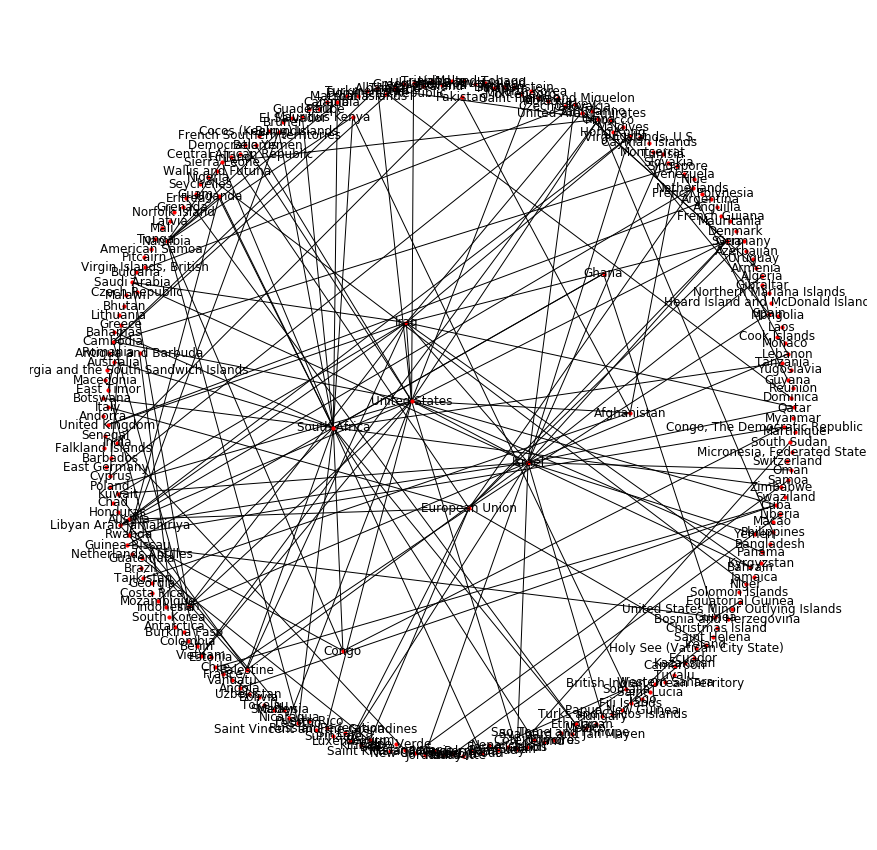

In [16]:
labels = {}
gfig, gax = plt.subplots(figsize=(15,15))
for i in matrix2:
    labels[i] = i
#nx.draw_networkx_labels(g, nx.spring_layout(g,k=0.35), labels, font_size=10)
nx.draw(g, nx.spring_layout(g,k=0.35), with_labels=True, node_size=10,ax=gax)

NameError: name 'allg' is not defined

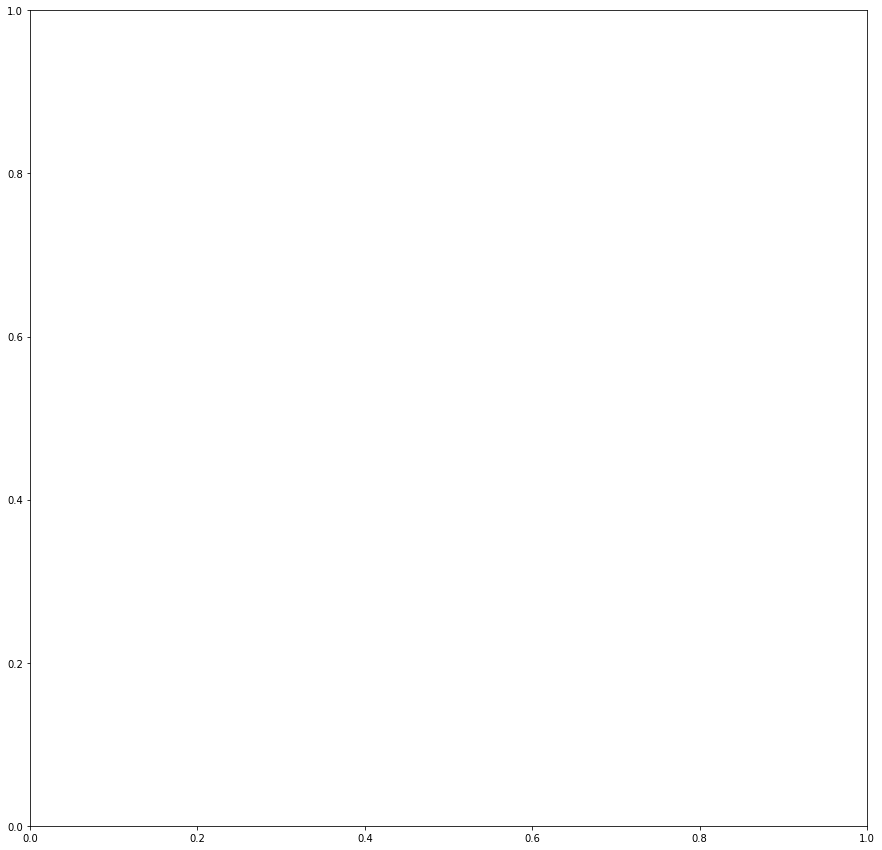

In [8]:
gfig, gax = plt.subplots(figsize=(15,15))
hego = nx.ego(allg,'United States',radius=2)
pos = nx.spring_layout(hego, k=20*1/math.sqrt(len(mat.index)),scale=8.0)
nx.draw(hego, pos, ax=gax, node_size=1000, with_label=True, font_size=18)

In [ ]:
years = {}
for row in db[1:]:
    yr = row[1]
    country = row[2]
    if country not in unknown_country:
        region = row[5]
        if yr not in years:
            years[yr] = {}
        if region not in years[yr]:
            years[yr][region] = 1
        else:
            years[yr][region] += 1

In [ ]:
for yr in sorted(years):
    for region in sorted(years[yr]):
        print(yr, region, years[yr][region])